# Precios CABA

https://drive.google.com/file/d/12hQg1jiP3b0JBWCIDcMqFnKgEjyZ4_h6/view?usp=sharing

1. Explorar dataset
2. Crear hipotesis
3. Determinar si hay diferencias significativas de precios entre Puerto Madero y Villa Luro
4. Mergear el dataset delitos_2019  https://drive.google.com/file/d/1MxIZRGKKUzaczJuqhomQCfCjkieugD1I/view?usp=sharing
5. ¿Hay diferencia significativa de delitos entre villa luro y puerto madero?
6. Hay correlacion entre delito y precio promedio de los barrios?
7. Haga un modelo de regresion lineal simple


--> sacar el precio promedio por barrio con un groupby

___

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df_precios_caba = pd.read_csv('/Users/lolonastri/Desktop/POO_UCEMA/machine_learning/1-regresion-lineal/datos_precios_caba.csv')
df_precios_caba

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


___

# 1) Explorar el dataset

In [3]:
# Cantidad de filas

print("El dataset tiene " + str(df_precios_caba.shape[0])+ " filas.")

El dataset tiene 146660 filas.


In [4]:
# Cantidad de columnas

print("El dataset tiene " + str(df_precios_caba.shape[1])+ " columnas.")

El dataset tiene 19 columnas.


In [5]:
# Nombre de columnas

df_precios_caba.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [6]:
# Tipo de columnas

df_precios_caba.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [7]:
# Información básica

df_precios_caba.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [8]:
# Valores faltantes

df_precios_caba.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [9]:
# Porcentaje de faltantes

(df_precios_caba.isnull().sum()/len(df_precios_caba))

start_date         0.000000
end_date           0.000000
created_on         0.000000
lat                0.067674
lon                0.067905
l1                 0.000000
l2                 0.000000
l3                 0.000000
rooms              0.000000
bedrooms           0.000000
bathrooms          0.040618
surface_total      0.139963
surface_covered    0.147375
price              0.000000
currency           0.000000
title              0.000000
description        0.000000
property_type      0.000000
operation_type     0.000000
dtype: float64

Text(0.5, 0, '')

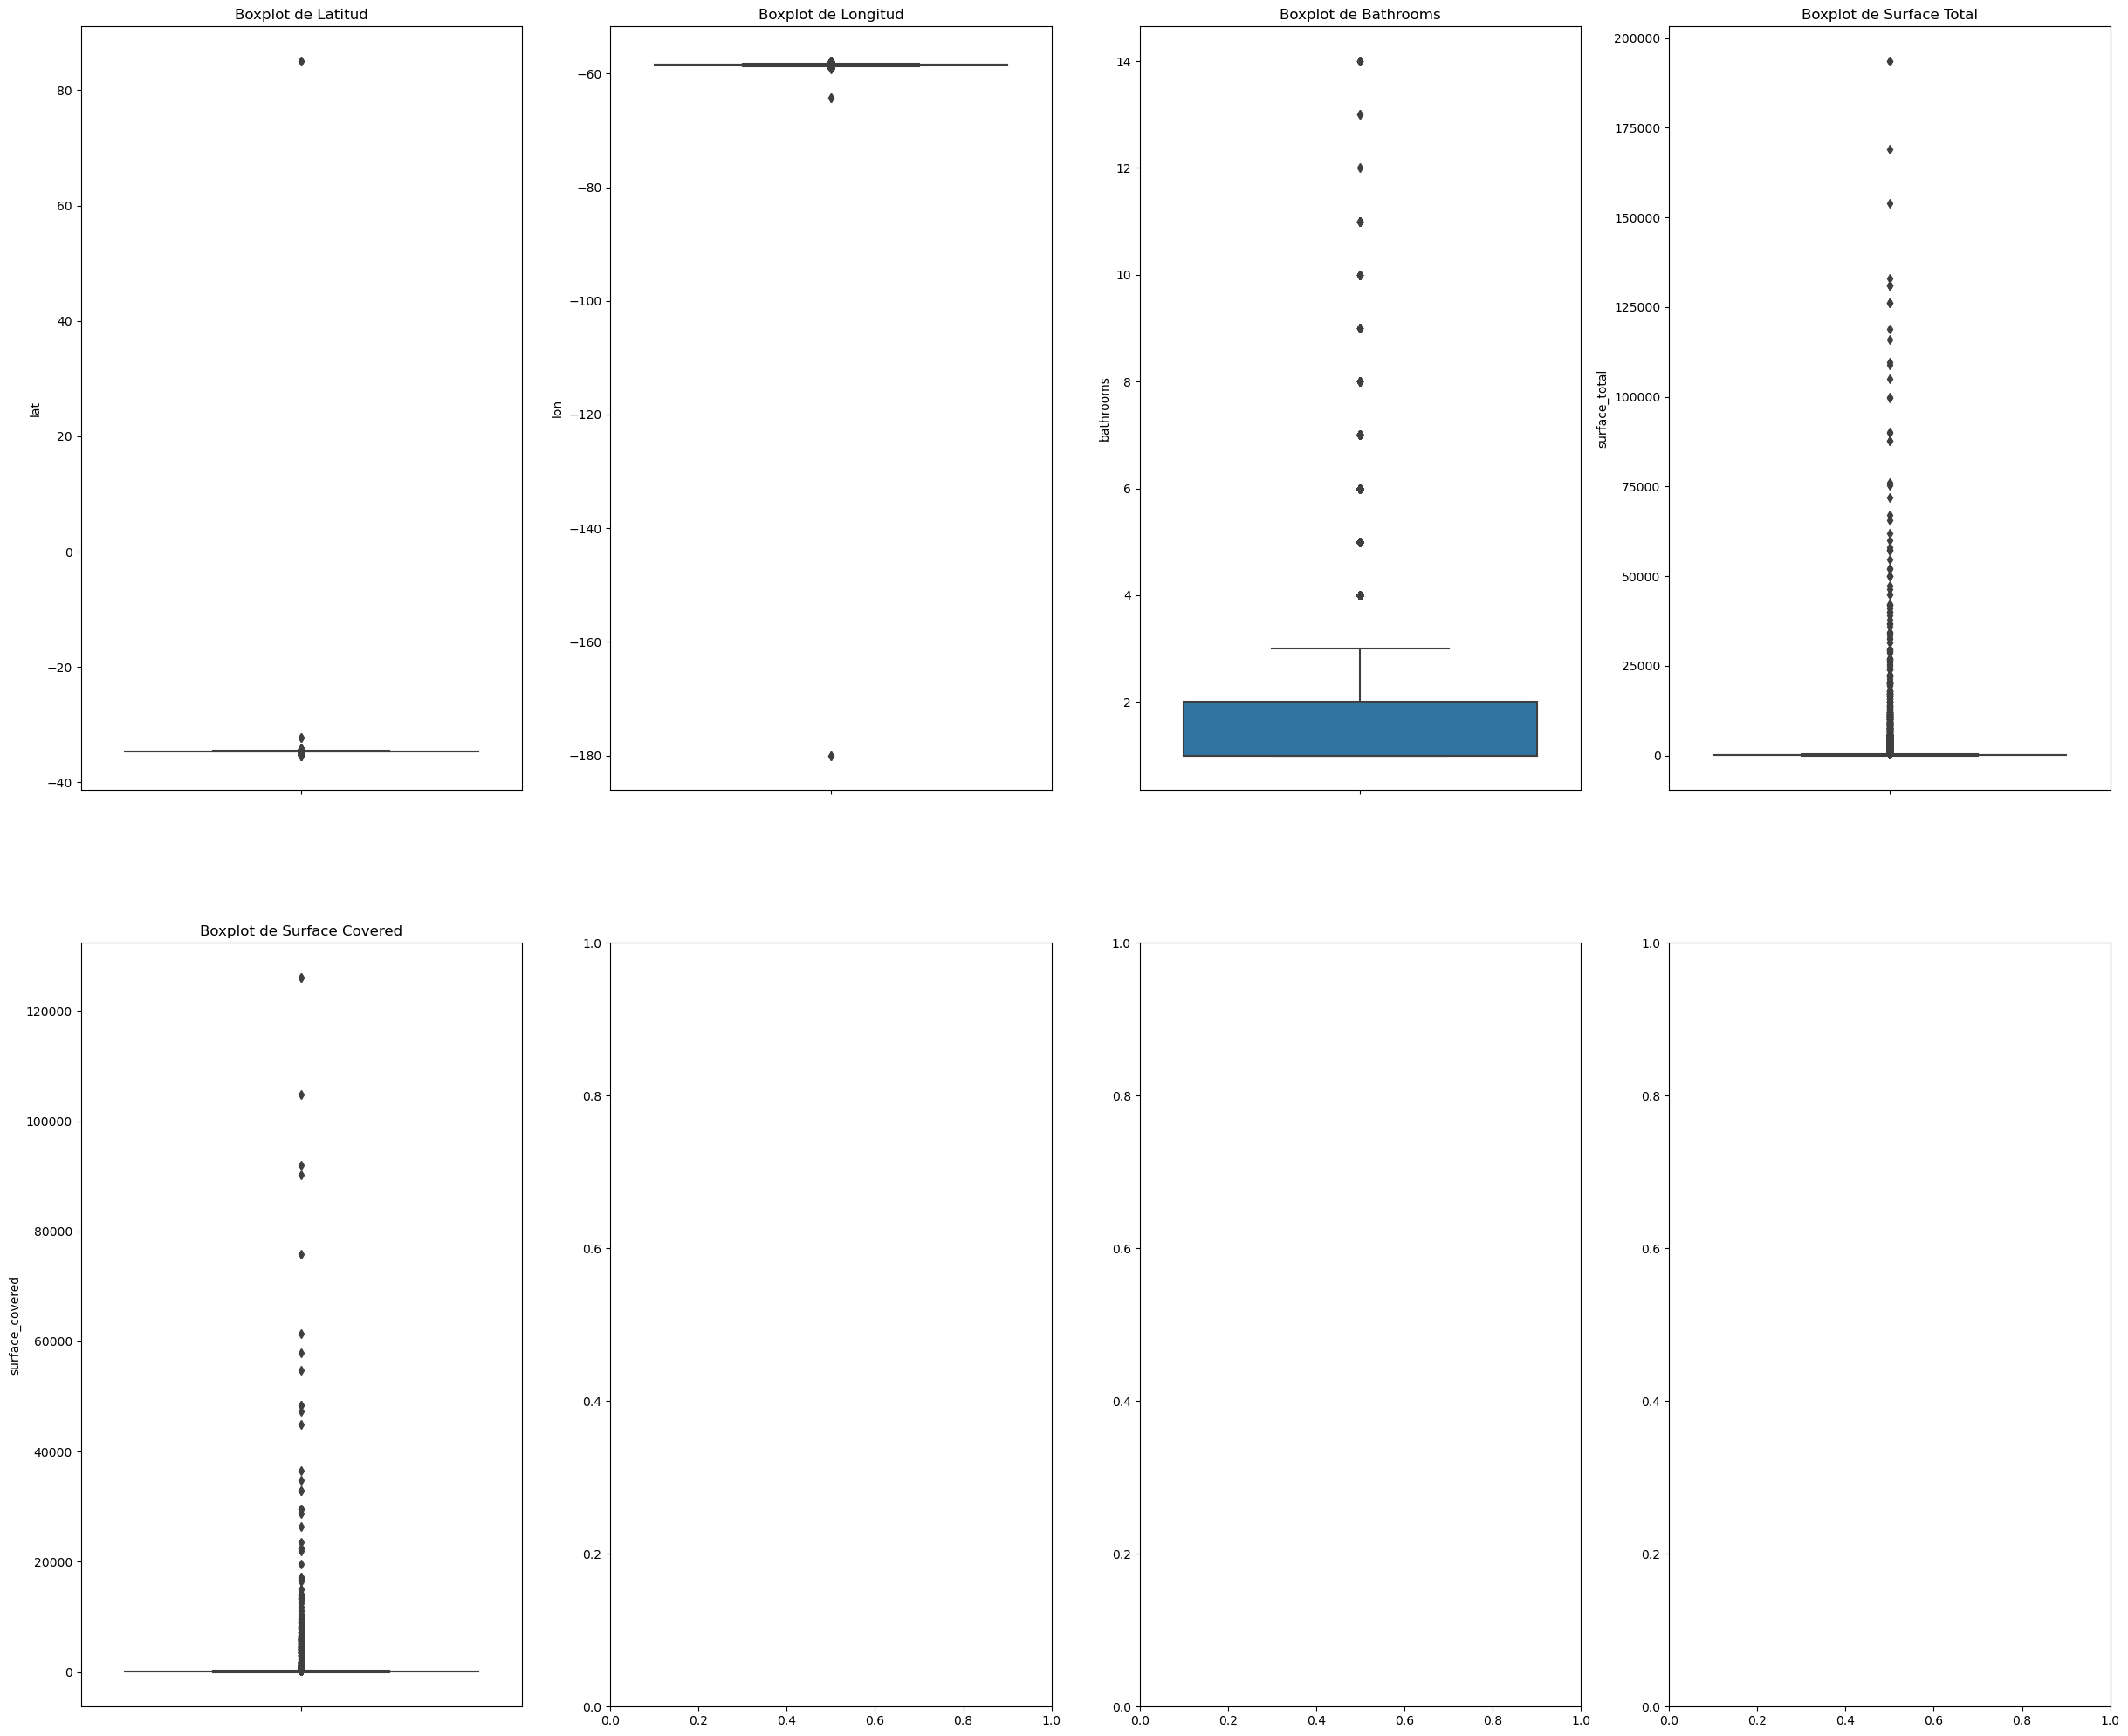

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(30, 25))

sns.boxplot(y='lat',data=df_precios_caba, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot de Latitud')
axes[0, 0].set_xlabel('')
sns.boxplot(y='lon',data=df_precios_caba, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Longitud')
axes[0, 1].set_xlabel('')
sns.boxplot(y='bathrooms',data=df_precios_caba, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot de Bathrooms')
axes[0, 2].set_xlabel('')
sns.boxplot(y='surface_total',data=df_precios_caba, ax=axes[0, 3])
axes[0, 3].set_title('Boxplot de Surface Total')
axes[0, 3].set_xlabel('')
sns.boxplot(y='surface_covered',data=df_precios_caba, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Surface Covered')
axes[1, 0].set_xlabel('')


## Muestro filas con faltantes

In [11]:
df_precios_caba[df_precios_caba.isnull().any(axis=1)]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
17,2019-10-17,2019-10-22,2019-10-17,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,1.0,53.0,42.0,145000.0,USD,Qbay Golf 1 dormitorio vista al agua (180418),EN VENTA CON RENTA!!! Ideal Inversionista Estu...,Departamento,Venta
26,2019-10-17,9999-12-31,2019-10-17,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Oeste,Morón,2.0,1.0,1.0,45.0,45.0,110000.0,USD,VENTA DEPARTAMENTO EN CIUDAD JARDIN,Venta departamento de 2 ambientes en excelente...,Departamento,Venta
35,2019-10-17,2019-12-23,2019-10-17,NaN,NaN,Argentina,Capital Federal,Palermo,2.0,1.0,2.0,81.0,76.0,410000.0,USD,Nuevo Ingreso Palacio Bellini Alquiler,Excelente departamento de dos ambientes de 81m...,Departamento,Venta
36,2019-10-17,2019-10-27,2019-10-17,NaN,NaN,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,42.0,38.0,169000.0,USD,Precioso Departamento con cochera Zona univer...,Excelente ubicación a una cuadra y media de av...,Departamento,Venta
46,2019-10-17,2019-10-31,2019-10-17,NaN,NaN,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,52.0,46.0,159500.0,USD,Departamento de 2 ambientes en Venta en Palerm...,2 Amplios y hermosos ambientes ambientes -C...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146571,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,57.0,46.0,120000.0,USD,VENTA - DEPARTAMENTO 2 AMBIENTES - CONTRAFRENT...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta
146575,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,64.0,56.0,141000.0,USD,VENTA - DEPARTAMENTO 2 AMBIENTES TIPO DUPLEX- ...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta
146577,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,USD,VENTA - DEPARTAMENTO 3 AMBIENTES AL RÍO - JARD...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta
146578,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,USD,VENTA - DEPARTAMENTO 3 AMBIENTES AL RÍO - JARD...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta


## Completar los valores faltantes automáticamente

In [12]:
df_precios_caba.fillna(0)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


___

# 2) Crear hipotesis

## El precio de las propiedades aumenta a medida que aumenta la superficie total

___

# 3) Determinar si hay diferencias significativas de precios entre Puerto Madero y Villa Luro

In [13]:
df_precios_caba['l3'].value_counts()

l3
Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: count, Length: 89, dtype: int64

In [14]:
df_precios_caba[df_precios_caba['l3'] == 'Puerto Madero']['price'].describe()

count    1.757000e+03
mean     9.846790e+05
std      7.538981e+05
min      6.000000e+03
25%      4.700000e+05
50%      7.500000e+05
75%      1.250000e+06
max      6.500000e+06
Name: price, dtype: float64

In [15]:
df_precios_caba[df_precios_caba['l3'] == 'Villa Luro']['price'].describe()

count    9.410000e+02
mean     1.610404e+05
std      1.143473e+05
min      4.790000e+04
25%      1.000000e+05
50%      1.300000e+05
75%      1.870000e+05
max      1.500000e+06
Name: price, dtype: float64

In [16]:
df_precios_puerto_madero = df_precios_caba[df_precios_caba['l3'] == 'Puerto Madero'].agg({'price': ['mean', 'median', 'std', 'min', 'max']})
df_precios_puerto_madero

,price
mean,9.846790e+05
median,7.500000e+05
std,7.538981e+05
min,6.000000e+03
max,6.500000e+06


In [17]:
df_precios_villa_luro = df_precios_caba[df_precios_caba['l3'] == 'Villa Luro'].agg({'price': ['mean', 'median', 'std', 'min', 'max']})
df_precios_villa_luro

,price
mean,1.610404e+05
median,1.300000e+05
std,1.143473e+05
min,4.790000e+04
max,1.500000e+06


### Si bien hay 8 veces mas propiedades en Villa Luro, el precio promedio de Puerto Madero es 10 veces mayor.

___

# 4) Mergear el dataset delitos_2019  https://drive.google.com/file/d/1MxIZRGKKUzaczJuqhomQCfCjkieugD1I/view?usp=sharing

In [18]:
df_delitos= pd.read_csv('/Users/lolonastri/Desktop/POO_UCEMA/machine_learning/1-regresion-lineal/delitos_2019.csv')
df_delitos

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123
...,...,...,...,...,...,...,...,...,...,...
117656,486770,2019-12-31,18,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,486678,2019-12-31,4,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,486668,2019-12-31,1,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,486750,2019-12-31,14,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145


In [19]:
df_precios_caba_delitos = pd.merge(df_precios_caba, df_delitos, how='left')
df_precios_caba_delitos

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,operation_type,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,long
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,Venta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,Venta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,Venta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,Venta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,...,Venta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085708,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,...,Venta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6085709,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,...,Venta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6085710,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,...,Venta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6085711,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,...,Venta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___

# 5) ¿Hay diferencia significativa de delitos entre villa luro y puerto madero?

### Para Puerto Madero

In [20]:
df_precios_caba_delitos[df_precios_caba_delitos['l3'] == 'Puerto Madero']['tipo_delito'].value_counts()

tipo_delito
Lesiones                 109128
Robo (con violencia)      47275
Hurto (sin violencia)     34678
Homicidio                   320
Name: count, dtype: int64

In [21]:
df_precios_caba_delitos[df_precios_caba_delitos['l3'] == 'Puerto Madero']['tipo_delito'].count() # ¿Se considera a la lesion como un delito?

191401

### Para Villa Luro

In [22]:
df_precios_caba_delitos[df_precios_caba_delitos['l3'] == 'Villa Luro']['tipo_delito'].value_counts()

tipo_delito
Lesiones                 3084
Robo (con violencia)     1440
Hurto (sin violencia)    1062
Homicidio                   9
Name: count, dtype: int64

In [23]:
df_precios_caba_delitos[df_precios_caba_delitos['l3'] == 'Villa Luro']['tipo_delito'].count()

5595

### La diferencia es ampliamente significativa. Puerto Madero tiene 35 veces más delitos que Villa Luro

___

# 6) ¿Hay correlacion entre delito y precio promedio de los barrios?

### Relación entre delito y precio promedio de Puerto Madero

In [24]:
relacion_entre_delito_y_precio_promedio_puerto_madero = df_precios_caba_delitos[df_precios_caba_delitos['l3'] == 'Puerto Madero'].agg({'price': 'mean', 'tipo_delito': 'count'})
relacion_entre_delito_y_precio_promedio_puerto_madero

price          964178.610115
tipo_delito    191401.000000
dtype: float64

### Relación entre delito y precio promedio de Villa Luro

In [25]:
relacion_entre_delito_y_precio_promedio_villa_luro = df_precios_caba_delitos[df_precios_caba_delitos['l3'] == 'Villa Luro'].agg({'price': 'mean', 'tipo_delito': 'count'})
relacion_entre_delito_y_precio_promedio_villa_luro

price          233830.791349
tipo_delito      5595.000000
dtype: float64

___

# 7) Haga un modelo de regresion lineal simple

In [26]:
import statsmodels.formula.api as smf

modelo = smf.ols('price ~ surface_total', data=df_precios_caba)
modelo = modelo.fit()
modelo

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [27]:
print(modelo.params)

Intercept        242152.952867
surface_total         5.674292
dtype: float64


In [28]:
modelo.rsquared

0.001499815288178108

In [29]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     189.5
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           4.49e-43
Time:                        09:19:06   Log-Likelihood:            -1.7690e+06
No. Observations:              126133   AIC:                         3.538e+06
Df Residuals:                  126131   BIC:                         3.538e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.422e+05    844.735    286.661      0.000     2.4e+05    2.44e+05
surface_total     5.6743      0.412     13.764      0.000       4.866       6.482
==============================================================================
Omnibus:                   259514.840   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       7300367409.707
Skew:                          16.515   Prob(JB):                         0.00
Kurtosis:                    1181.129   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Chequeo la formula
# Reviso errores y residuos.
n = len(df_precios_caba)
residuals = modelo.predict(df_precios_caba['surface_total'])/ df_precios_caba['price']
residuals.std()/df_precios_caba['price'].std()

3.6681162320340364e-06

In [34]:
predicted_prices = modelo.predict(df_precios_caba['surface_total'])
predicted_prices

0         242947.353810
1         242550.153338
2         242408.296027
3         242635.267725
4         242436.667489
              ...      
146655    242459.364659
146656    243083.536829
146657    242436.667489
146658    242368.575980
146659    242578.524801
Length: 146660, dtype: float64